In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
from tensorflow import keras

In [15]:
#!pip install tensorflow --upgrade
#!pip install numpy --upgrade

In [16]:
from keras.layers import Input, Lambda, Dense, Flatten

In [17]:
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [18]:
IMAGE_SIZE = [224, 224]

train_path = 'train'
valid_path = 'test'

In [19]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [20]:
for layer in vgg.layers:
    layer.trainable = False

In [22]:
folders = glob('train/*')
x = Flatten()(vgg.output)

In [23]:
prediction = Dense(len(folders), activation='sigmoid')(x)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │          50,178 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [24]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [25]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)




# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')




test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [27]:
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=2,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)


Epoch 1/2
522/522 ━━━━━━━━━━━━━━━━━━━━ 1539s 3s/step - accuracy: 0.9292 - loss: 0.1793 - val_accuracy: 0.8333 - val_loss: 0.6135
Epoch 2/2
522/522 ━━━━━━━━━━━━━━━━━━━━ 1532s 3s/step - accuracy: 0.9555 - loss: 0.1356 - val_accuracy: 0.8814 - val_loss: 0.4361


In [28]:
import tensorflow as tf
from keras.models import load_model

model.save('chest_xray_v1.h5')

In [1]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

In [2]:
model=load_model('chest_xray_v1.h5')

In [9]:
img=image.load_img("C:\\Project_4\\train\\NORMAL\\IM-0145-0001.jpeg",target_size=(224,224))


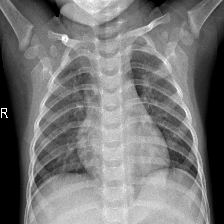

In [10]:
img

In [11]:
x=image.img_to_array(img)

In [12]:
x

array([[[ 96.,  96.,  96.],
        [105., 105., 105.],
        [104., 104., 104.],
        ...,
        [143., 143., 143.],
        [108., 108., 108.],
        [ 62.,  62.,  62.]],

       [[101., 101., 101.],
        [103., 103., 103.],
        [108., 108., 108.],
        ...,
        [114., 114., 114.],
        [ 67.,  67.,  67.],
        [ 58.,  58.,  58.]],

       [[110., 110., 110.],
        [103., 103., 103.],
        [106., 106., 106.],
        ...,
        [ 60.,  60.,  60.],
        [ 54.,  54.,  54.],
        [ 59.,  59.,  59.]],

       ...,

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,  

In [13]:
x=np.expand_dims(x, axis=0)

In [14]:
img_data=preprocess_input(x)

In [15]:
classes=model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [55]:
result=int(classes[0][1])

In [16]:
if classes[0][1]<0.5:
    print(f"Result is Normal {round((1-classes[0][1])*100)}%")
else:
    print(f"Person is Affected By PNEUMONIA  {round(classes[0][1]*100)}%")

Result is Normal 100%


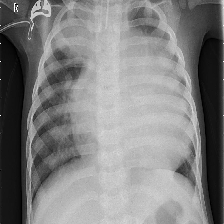

In [17]:
img=image.load_img("C:\\Project_4\\train\\PNEUMONIA\\person5_bacteria_19.jpeg",target_size=(224,224))
img

In [18]:
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)
classes

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0., 1.]], dtype=float32)

In [19]:
if classes[0][1]<0.5:
    print(f"Result is Normal {round((1-classes[0][1])*100)}%")
else:
    print(f"Person is Affected By PNEUMONIA  {round(classes[0][1]*100)}%")

Person is Affected By PNEUMONIA  100%
